In [2]:
import sys
sys.argv = ['']
sys.path.append("../..")

In [3]:
from src.grid_world import GridWorld
from examples.agent import Agent
import numpy as np

In [4]:
class Sarsa(Agent):
    def __init__(self, env, num_episodes=5000, episode_length=1000,
                 gamma=0.9, alpha=0.1, epsilon=0.1):
        """
        Sarsa (on-policy TD control)
        """
        super().__init__(
            env=env,
            epsilon=epsilon,
            gamma=gamma,
            num_episodes=num_episodes,
            episode_length=episode_length
        )
        self.alpha = alpha

    def run(self):
        for episode in range(self.num_episodes):
            self.env.reset()
            s0 = self.env.start_state
            a0_idx = self.choose_action(self.state2idx(s0))
            a0 = self.idx2action(a0_idx)
            st = s0
            at = a0
            while st != self.env.target_state:
                s_next, reward, done, _ = self.env.step(at)
                a_next_idx = self.choose_action(self.state2idx(s_next))
                a_next = self.idx2action(a_next_idx)

                # Sarsa update the (st, at) pair
                st_idx = self.state2idx(st)
                at_idx = self.action2idx(at)
                s_next_idx = self.state2idx(s_next)
                a_next_idx = self.action2idx(a_next)

                TD_target = reward + self.gamma * self.Q[s_next_idx, a_next_idx]
                TD_error = self.Q[st_idx, at_idx] - TD_target

                self.Q[st_idx, at_idx] -= TD_error * self.alpha

                # Sarsa update the policy
                self.update_policy(st_idx)

                st = s_next
                at = a_next

            if (episode + 1) % 500 == 0:
                print(f"Episode {episode + 1} finished.")

    def update_policy(self, st_idx):
        """
        Update policy using epsilon-greedy strategy.
        """
        greedy_action = np.argmax(self.Q[st_idx, :])
        for a in range(self.num_actions):
            if a == greedy_action:
                self.policy[st_idx, a] = 1 - self.epsilon + (self.epsilon / self.num_actions)
            else:
                self.policy[st_idx, a] = self.epsilon / self.num_actions



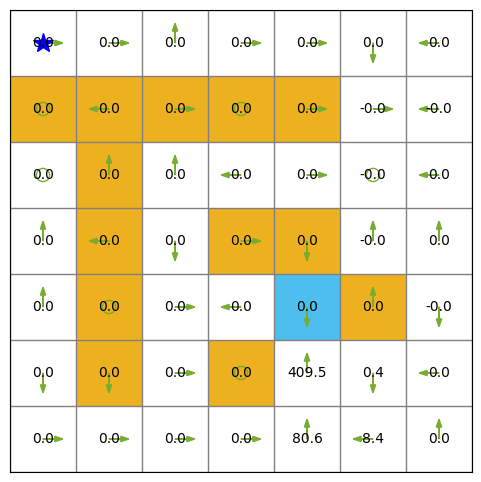

Final Policy:
[[0.04 0.84 0.04 0.04 0.04]
 [0.04 0.84 0.04 0.04 0.04]
 [0.04 0.04 0.84 0.04 0.04]
 [0.04 0.84 0.04 0.04 0.04]
 [0.04 0.84 0.04 0.04 0.04]
 [0.84 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.84 0.04]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.04 0.84 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.84 0.04]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.04 0.04 0.04 0.84 0.04]
 [0.04 0.84 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.84]
 [0.04 0.04 0.04 0.84 0.04]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.04 0.04 0.84 0.04 0.04]
 [0.04 0.04 0.84 0.04 0.04]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2  0.2 ]
 [0.84 0.04 0.04 0.04 0.04]
 [0.84

In [5]:
env = GridWorld()
env.reward_step = 0
env.reward_target = 1000
agent = Sarsa(env, epsilon=0.2, gamma=0.99, num_episodes=5, episode_length=1000)
agent.run()
agent.render_static()
print("Final Policy:")
print(agent.get_policy())
